In [14]:
import math
import time
from matplotlib import pyplot as plt
class KnnClustered:
    def __init__(self, graph, k):
        self.graph = graph
        self.k = k
        self.area = 1
        self.rounds = 5
        if(k >= graph.totalNodes):
            self.k = graph.totalNodes-1
        
    def __increaseArea(self):
            self.rounds += 1
            self.area = pow(2,self.rounds)
            
    def __resetArea(self):
        self.area = 1
    
    def __searchSpace(self,x, y):
        knn = set()
        #Define os limites superiores e inferiores da busca
        minX = 0
        maxX = self.graph.totalNodes
        minY = 0
        maxY = self.graph.totalNodes
        if (x - self.area) > 0:
            minX = x - self.area
        if (x + self.area) < maxX:
            maxX = x + self.area
        if (y - self.area) > 0:
            minY = y - self.area
        if (y + self.area) < maxY:
            maxY = y + self.area
        # Adiciona todos os nós da região na lista "neighbors"
        origin = ",".join((str(x),str(y)))
        for a in range(minX, maxX+1):
            for b in range(minY, maxY+1):
                nodeKey = ",".join((str(a),str(b)))
                knn.add(nodeKey)
        try:
            knn.remove(origin)
        except KeyError:
            pass
        return set(knn)
    
    def __minimumViableSet(self, x, y):
        self.__resetArea()
        nodes = set(grafo.nodes.keys()).intersection(self.__searchSpace(x, y))
        while len(nodes) < self.k:
            self.__increaseArea()
            nodes = set(grafo.nodes.keys()).intersection(self.__searchSpace(x, y))
        return list(nodes)
    
    def __euclidianDistance(self,x1,y1, x2, y2):
        x = abs(x2 - x1)
        y = abs(y2 - y1)
        return math.sqrt(pow(x,2) + pow(y,2))
    
    def __kNearestNeighbors(self, x, y):
        viableListWithDistance = dict()
        viableList = knn.__minimumViableSet(x, y)
        while len(viableList) > 0:
            nodeKey = viableList.pop()
            node = self.graph.nodes[nodeKey]
            distance = self.__euclidianDistance(x,y,node.x,node.y)
            viableListWithDistance[nodeKey] = distance
        return sorted(viableListWithDistance, key=viableListWithDistance.get)[:3]
    
    def Execute(self):
        tic = time.perf_counter()
        epoch = 0
        for key in self.graph.nodes:
            epoch += 1
            #print(epoch)
            source = self.graph.nodes[key]
            knn = self.__kNearestNeighbors(source.x, source.y)
            for n in knn:
                destination = self.graph.nodes[n]
                self.graph.addEdge(source, destination)
        toc = time.perf_counter()
        #print(f"Executed in {toc - tic:0.4f} seconds")
        timeval = toc - tic
        return timeval
    

In [2]:
import random
from src.classes.graph import Graph
from src.classes.node import Node

In [3]:
def populateGraph(graph,n, seed):
    random.seed(seed)
    xValues = random.sample(range(0, n+1), n)
    yValues = random.sample(range(0, n+1), n)
    for i in range(len(xValues)):
        nodeKey = ",".join((str(xValues[i]),str(yValues[i])))
        node = Node(nodeKey, xValues[i], yValues[i])
        graph.addVertex(node)

In [4]:
grafo = Graph(nodeType=Node)
populateGraph(grafo, 10, 200)

In [5]:
knn = KnnClustered(grafo, 3)

In [6]:
tempo = knn.Execute()

In [13]:
executionTime = []
for a in range(100):
    grafo = Graph(nodeType=Node)
    populateGraph(grafo, a+1, 200)
    knn = KnnClustered(grafo, 3)
    timeval = knn.Execute()
    executionTime.append(timeval)

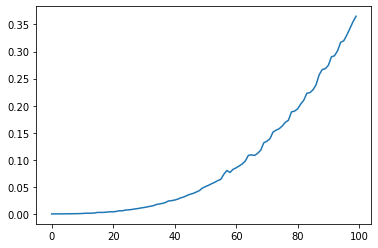

In [14]:
plt.plot(executionTime)

In [10]:
from sklearn.neighbors import kneighbors_graph

In [11]:
import numpy as np
n = 10
nodes = list()
random.seed(200)
xValues = random.sample(range(0, n+1), n)
yValues = random.sample(range(0, n+1), n)
for i in range(len(xValues)):
    nodes.append([xValues[i], yValues[i]])
X = np.array(nodes)
A = kneighbors_graph(X, 3, mode='connectivity')
A.toarray()

array([[0., 0., 0., 0., 1., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.]])

In [12]:
nodes

[[0, 0],
 [3, 7],
 [10, 4],
 [2, 9],
 [4, 3],
 [7, 1],
 [8, 5],
 [9, 10],
 [5, 8],
 [6, 2]]

In [7]:
grafo.printGraph()

0,0
0,0 -> 4,3
0,0 -> 6,2
0,0 -> 7,1
3,7
3,7 -> 5,8
3,7 -> 2,9
3,7 -> 4,3
10,4
10,4 -> 8,5
10,4 -> 7,1
10,4 -> 6,2
10,4 -> 9,10
2,9
2,9 -> 3,7
2,9 -> 5,8
2,9 -> 4,3
4,3
4,3 -> 0,0
4,3 -> 3,7
4,3 -> 2,9
4,3 -> 6,2
4,3 -> 7,1
7,1
7,1 -> 0,0
7,1 -> 10,4
7,1 -> 4,3
7,1 -> 6,2
7,1 -> 8,5
8,5
8,5 -> 10,4
8,5 -> 7,1
8,5 -> 6,2
8,5 -> 9,10
8,5 -> 5,8
9,10
9,10 -> 5,8
9,10 -> 8,5
9,10 -> 10,4
5,8
5,8 -> 3,7
5,8 -> 2,9
5,8 -> 9,10
5,8 -> 8,5
6,2
6,2 -> 0,0
6,2 -> 10,4
6,2 -> 4,3
6,2 -> 7,1
6,2 -> 8,5


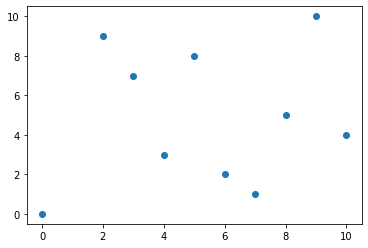

In [17]:
plt.scatter(xValues, yValues)